Using the Volume column in historical data for forecasting can provide additional information and potentially improve the accuracy of the predictions. The volume of trading activity can be a useful indicator of market sentiment and liquidity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import yfinance as yf

# Define the ticker symbol for the S&P 500 index
ticker_symbol = "TSLA"

# Define the desired date range for the historical data
start_date = "2018-06-27"
end_date = "2023-06-27"

# Download the historical data using yfinance
df_data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Print the downloaded data
print(df_data)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-06-27   23.000000   23.386000   22.633333   22.966667   22.966667   
2018-06-28   23.243999   23.801332   23.073999   23.328667   23.328667   
2018-06-29   23.555332   23.590668   22.827333   22.863333   22.863333   
2018-07-02   24.004667   24.318666   21.990000   22.337999   22.337999   
2018-07-03   22.116667   22.166000   20.646000   20.724001   20.724001   
...                ...         ...         ...         ...         ...   
2023-06-20  261.500000  274.750000  261.119995  274.450012  274.450012   
2023-06-21  275.130005  276.989990  257.779999  259.459991  259.459991   
2023-06-22  250.770004  265.000000  248.250000  264.609985  264.609985   
2023-06-23  259.290009  262.450012  252.800003  256.600006  256.600006   
2023-06-26  250.070007  258.369995  240.699

In [ ]:
close_prices = df_data["Close"]


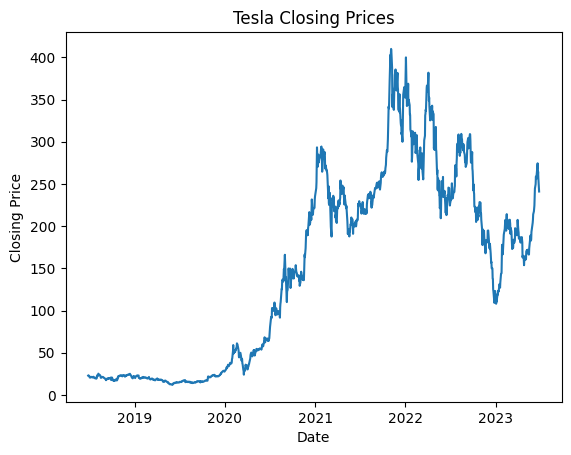

In [ ]:
plt.plot(close_prices)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Tesla Closing Prices")
plt.show()


In [ ]:
df_data["Close"].isnull().sum()

0

In [ ]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-06-27 to 2023-06-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


In [ ]:
df_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,147.646966,151.087111,143.918131,147.598781,147.598781,1.366143e+08
std,113.503745,116.064552,110.614775,113.354294,113.354294,8.913825e+07
min,12.073333,12.445333,11.799333,11.931333,11.931333,2.940180e+07
25%,22.783333,23.166668,22.297333,22.744667,22.744667,7.870950e+07
50%,153.440002,160.669998,149.116669,153.766663,153.766663,1.087860e+08
75%,237.566666,243.300003,233.416672,237.306671,237.306671,1.667460e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [ ]:
import plotly.express as px
import seaborn as sns

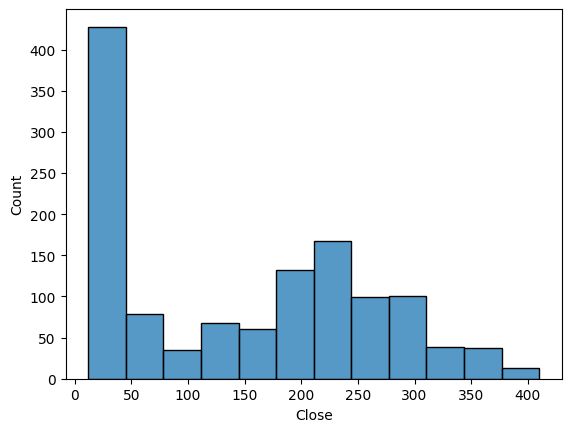

In [ ]:
sns.histplot(df_data['Close']);

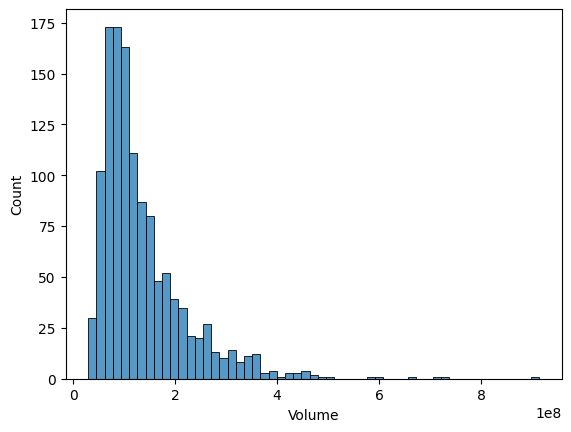

In [ ]:
sns.histplot(df_data['Volume']);

Positive skewness in the distribution of volume is not uncommon in stock market data. It suggests that there are relatively more days with lower trading volumes and fewer days with higher trading volumes. Understanding the skewness in volume data can provide insights into market dynamics, liquidity patterns, and trading behavior.

The plot(kind='kde') function is used to generate a kernel density estimation (KDE) plot. KDE is a non-parametric way to estimate the probability density function of a random variable. In the context of plotting, a KDE plot visualizes the distribution of a variable by estimating its probability density.

<Axes: ylabel='Density'>

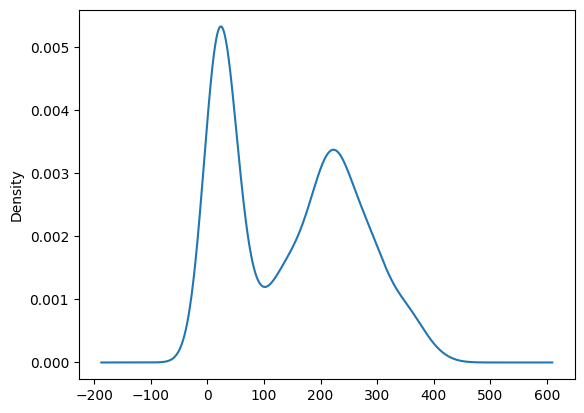

In [ ]:
df_close = df_data['Close']
df_close.plot(kind='kde')

### Dicky Fuller test
The Dickey-Fuller test is used to test the null hypothesis that a unit root is present in a time series (i.e., the series is non-stationary). The test statistic is compared to critical values to determine the significance of the test.

If the p-value is below a certain significance level (e.g., 0.05), then you can reject the null hypothesis and conclude that the series is stationary. On the other hand, if the p-value is above the significance level, then you fail to reject the null hypothesis, indicating that the series is non-stationary.

By performing the Dickey-Fuller test on the Tesla close price data, you can assess its stationarity, which is important for time series analysis and modeling.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df_data['Close'])

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("Test Statistic:", test_statistic)
print("p-value:", p_value)


Test Statistic: -1.399636285291132
p-value: 0.5824504754998248


The test statistic is a numerical value that is compared to critical values to determine the significance of the test. In this case, the test statistic is -1.399636285291132.

The p-value is a measure of the strength of evidence against the null hypothesis. In this case, the p-value is 0.5824504754998248.

Based on the test results, if we use a significance level of 0.05, the p-value of 0.5824504754998248 is greater than the significance level. Therefore, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that a unit root (non-stationarity) is present in the Tesla close price data.

In simpler terms, the results indicate that the Tesla close price data is likely non-stationary, meaning it may exhibit trends, seasonality, or other patterns over time. Stationarity is an important assumption for many time series models, and non-stationarity can affect the accuracy of forecasts and model performance.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df_data['Volume'])

# Extract the test statistic and p-value
test_statistic = result[0]
p_value = result[1]

# Print the results
print("Test Statistic:", test_statistic)
print("p-value:", p_value)

Test Statistic: -3.4571503195212223
p-value: 0.009158222100595284


A more negative test statistic and a smaller p-value indicate stronger evidence against the null hypothesis of non-stationarity. In the case of the Volume data, the test statistic is -3.457 and the p-value is 0.009, which suggests that there is strong evidence to reject the null hypothesis of non-stationarity.

A p-value below a certain significance level (e.g., 0.05) indicates that the data is likely stationary. In this case, the p-value is less than 0.05, suggesting that the Volume data is likely stationary.

Having stationary data can be beneficial for forecasting models as it implies that the statistical properties of the data are relatively constant over time, making it easier to capture patterns and make accurate predictions.

Both Volume and Close price data can be valuable for forecasting, but they capture different aspects of market behavior. If the primary focus is on predicting price movements or conducting technical analysis, the Close price data may be more relevant. However, if you are interested in understanding market activity and liquidity, or if volume patterns are of particular interest to you, then the Volume data could be more informative.

### Correlation between Close price and volume

In [ ]:

# Calculate the correlation matrix
correlation_matrix = df_data[['Volume', 'Close']].corr()

# Print the correlation between Volume and Close price
correlation = correlation_matrix.loc['Volume', 'Close']
print("Correlation between Volume and Close price:", correlation)

Correlation between Volume and Close price: -0.39522689454158094


The correlation between Volume and Close price in your dataset is approximately -0.3952. This negative correlation suggests a weak inverse relationship between the two variables. It indicates that as the Volume increases, the Close price tends to decrease slightly, and vice versa. However, the correlation value of -0.3952 indicates a relatively weak correlation, meaning that the relationship between Volume and Close price is not very strong or consistent.

### Moving Average and Standard deviation
Rolling Mean (or Moving Average): It is the average value of a series of data points within a moving window. The window slides through the data points, and at each position, it calculates the mean of the data points within the window. The rolling mean smooths out the fluctuations in the data and helps identify the underlying trends. It is useful for detecting the overall direction or pattern in the data.

Rolling Standard Deviation: It measures the dispersion or variability of the data within a moving window. Similar to the rolling mean, the window slides through the data, and at each position, it calculates the standard deviation of the data points within the window. The rolling standard deviation helps identify periods of high or low volatility in the data.

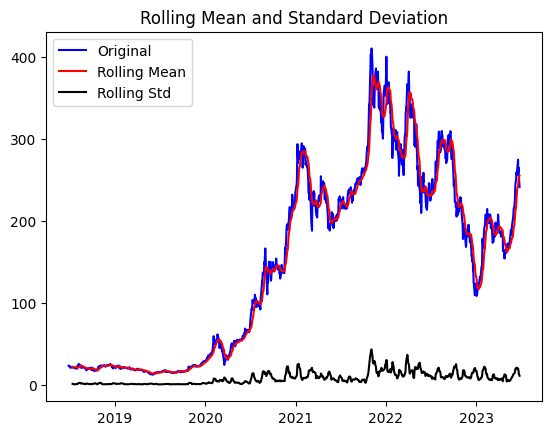

Results of dickey fuller test
Test Statistics                  -1.399636
p-value                           0.582450
No. of lags used                 18.000000
Number of observations used    1238.000000
critical value (1%)              -3.435643
critical value (5%)              -2.863877
critical value (10%)             -2.568014
dtype: float64


In [ ]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_close)

Based on the Dickey-Fuller test results for the close price of Tesla, the test statistic value of -1.399636 is more negative than the critical values at all common significance levels (1%, 5%, and 10%). However, the p-value of 0.582450 is greater than the significance level of 0.05. This suggests that there is not enough evidence to reject the null hypothesis of a unit root (non-stationarity) in the close price data.

Since the close price data is not stationary, it may not be appropriate to directly apply an ARIMA model to the data. ARIMA models are typically used for stationary time series data.

### Decomposing data
decomposing the data can help in obtaining smoother components and better understanding the underlying patterns. Decomposition is a technique that separates a time series into its individual components, typically trend, seasonality, and residual (or error) components.

By decomposing the data, you can isolate and analyze each component separately. This can provide insights into the long-term trend, cyclic patterns, and irregular fluctuations in the data. It can also help in identifying any systematic patterns or anomalies that may exist.

For time series data like stock prices, a commonly used decomposition method is the **additive decomposition**. In additive decomposition, the time series is decomposed into three components: **trend, seasonality, and residual**.

`The additive decomposition assumes that the overall time series is a sum of these three components, where the seasonal and residual components have constant variances over time`.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(df_data['Close'], model='additive', period = 30 )

# Obtain the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid




<Figure size 640x480 with 0 Axes>

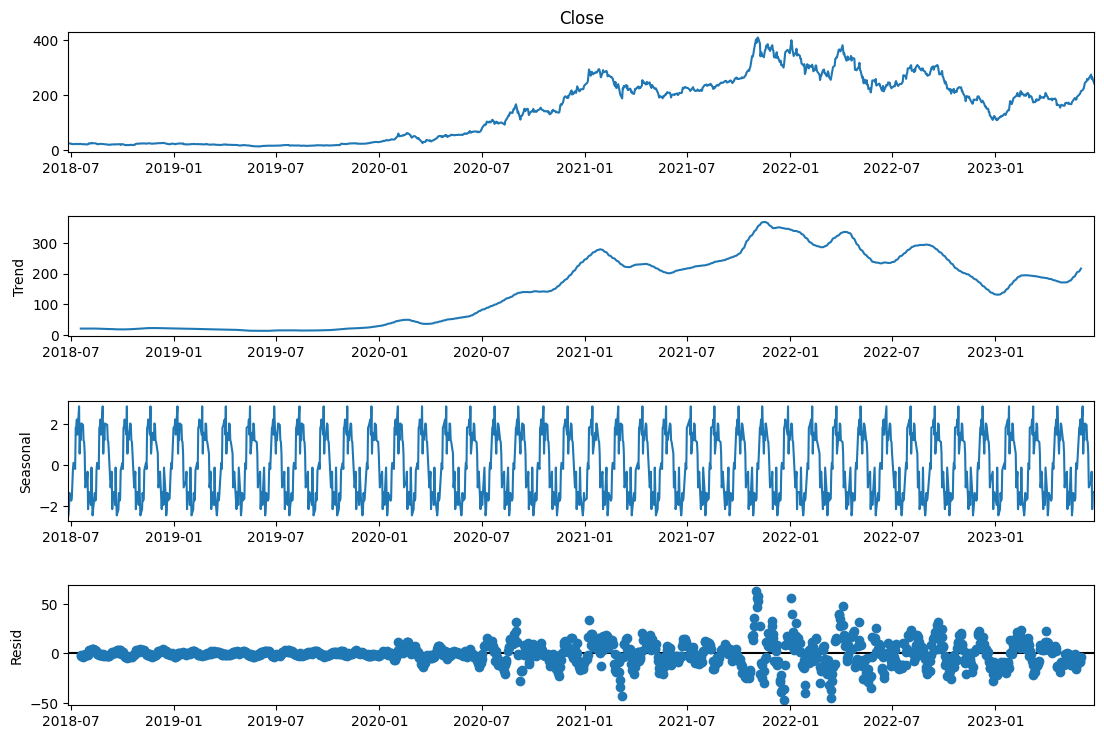

In [ ]:
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(12, 8)

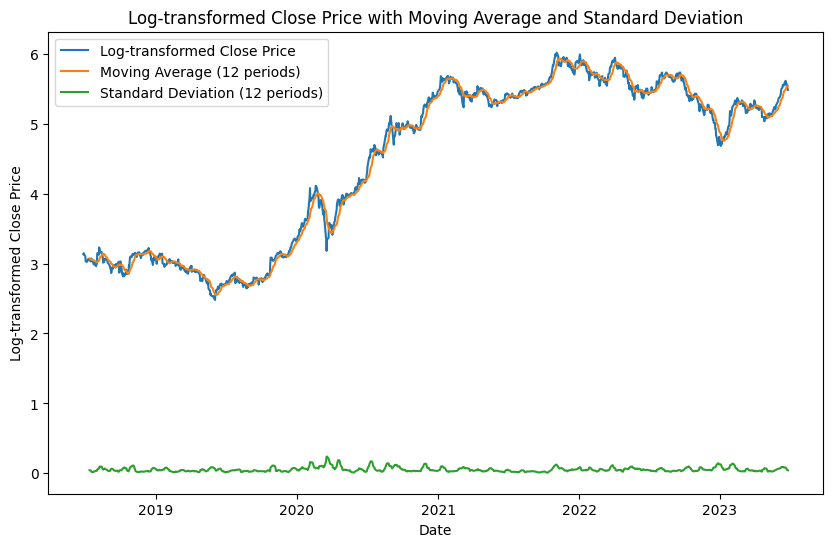

In [ ]:
from pylab import rcParams
import numpy as np

# Set the figure size
rcParams['figure.figsize'] = 10, 6

# Calculate the log-transformed close price
df_log = np.log(df_data['Close'])

# Calculate the moving average
moving_avg = df_log.rolling(12).mean()

# Calculate the standard deviation
std_dev = df_log.rolling(12).std()

# Plot the log-transformed close price, moving average, and standard deviation
plt.plot(df_log, label='Log-transformed Close Price')
plt.plot(moving_avg, label='Moving Average (12 periods)')
plt.plot(std_dev, label='Standard Deviation (12 periods)')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Log-transformed Close Price')
plt.title('Log-transformed Close Price with Moving Average and Standard Deviation')

# Add legend
plt.legend()

# Show the plot
plt.show()

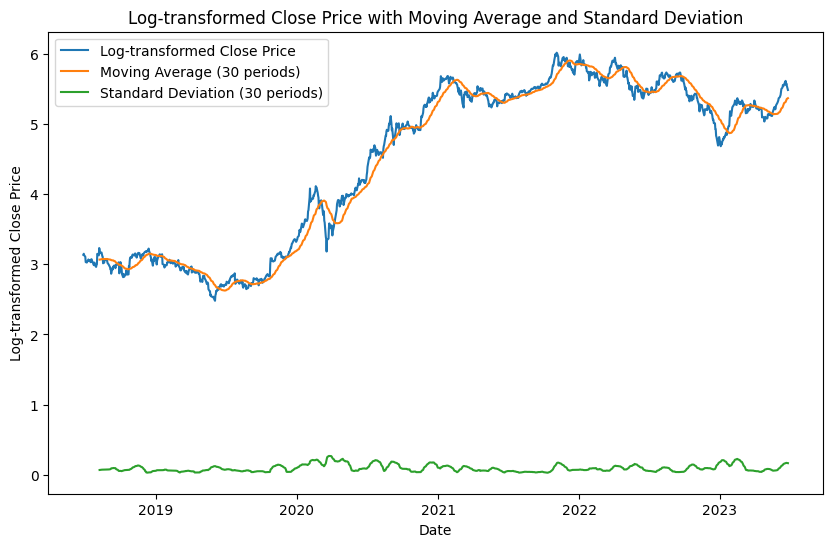

In [ ]:
from pylab import rcParams
import numpy as np

# Set the figure size
rcParams['figure.figsize'] = 10, 6

# Calculate the log-transformed close price
df_log = np.log(df_data['Close'])

# Calculate the moving average
moving_avg = df_log.rolling(30).mean()

# Calculate the standard deviation
std_dev = df_log.rolling(30).std()

# Plot the log-transformed close price, moving average, and standard deviation
plt.plot(df_log, label='Log-transformed Close Price')
plt.plot(moving_avg, label='Moving Average (30 periods)')
plt.plot(std_dev, label='Standard Deviation (30 periods)')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Log-transformed Close Price')
plt.title('Log-transformed Close Price with Moving Average and Standard Deviation')

# Add legend
plt.legend()

# Show the plot
plt.show()



### Data splitting

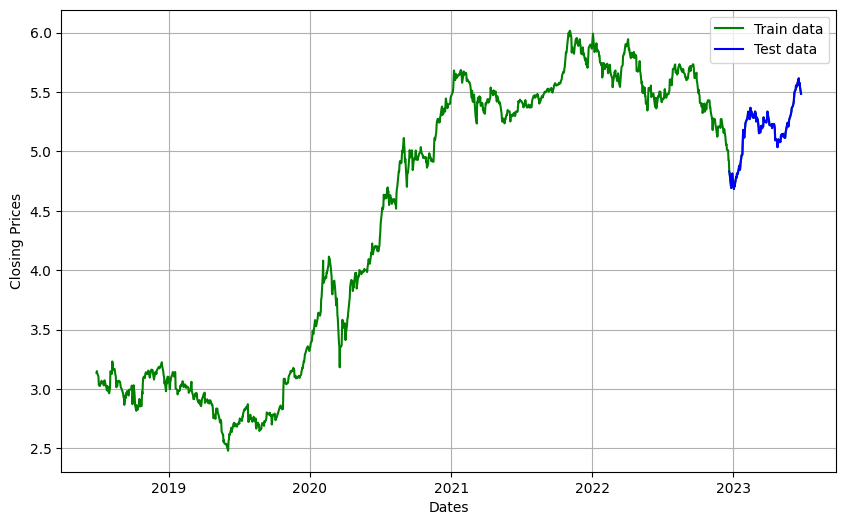

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

### Optimize Arima model parameters

the auto_arima function with additional options and settings to find the optimal ARIMA model parameters for your train_data time series. The test='adf' argument specifies that the augmented Dickey-Fuller test should be used to determine the optimal differencing parameter d.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3938.594, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3937.322, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3937.251, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3938.939, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3936.011, Time=2.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 5.072 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1128
Model:               SARIMAX(0, 1, 0)   Log Likelihood                1970.470
Date:                Fri, 30 Jun 2023   AIC                          -3938.939
Time:                        20:09:02   BIC                          -3933.912
Sample:                             0   HQIC                         -3937.040
                               - 1128                                  

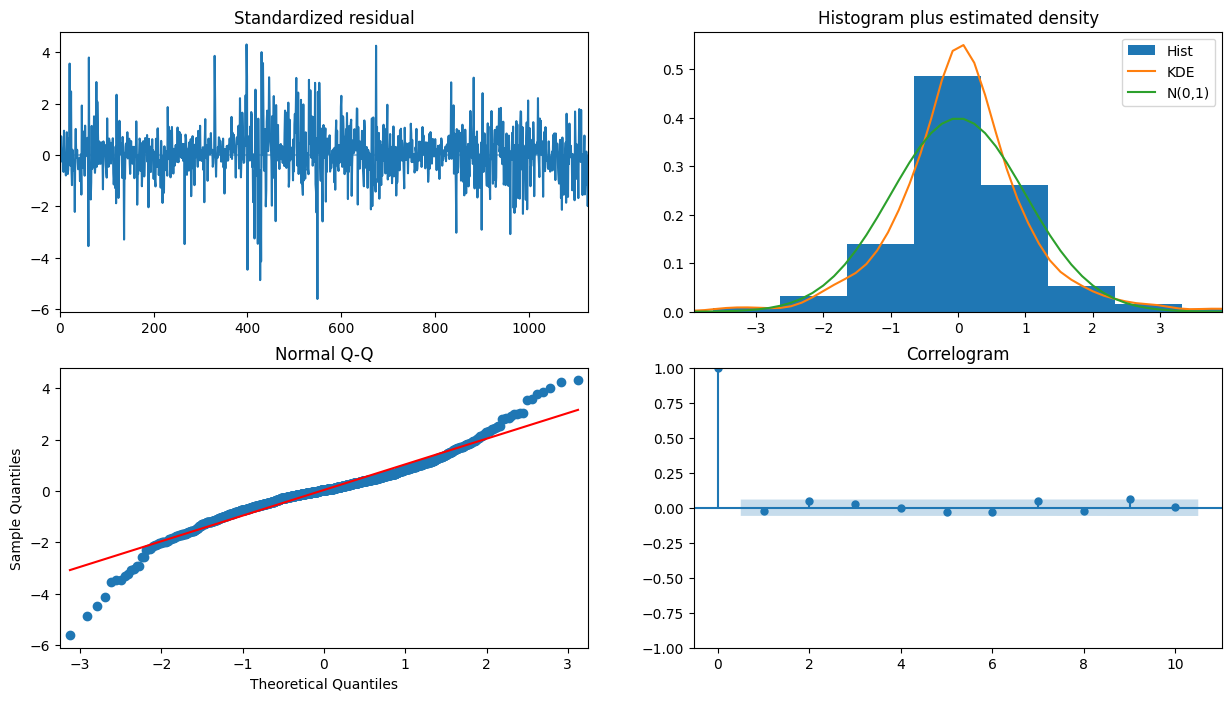

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


The best model selected by the auto_arima function for your time series is an ARIMA(0,1,0) model. This indicates that differencing of order 1 is needed to achieve stationarity.

The log likelihood value is 1970.470, and the Akaike Information Criterion (AIC) is -3938.939. Lower AIC values indicate better model fit.

The model's coefficient for the sigma squared parameter is 0.0018, with a standard error of 4.45e-05. The p-value associated with this coefficient is close to zero, indicating its significance in the model.

The Ljung-Box statistic tests for the absence of serial correlation in the residuals. In this case, the Ljung-Box test for lag 1 (Q-statistic) has a value of 0.73, suggesting no significant serial correlation.

The Jarque-Bera test is a goodness-of-fit test for normality of the residuals. The JB statistic is 637.60, and the associated p-value is close to zero, indicating non-normality of the residuals.

The Heteroskedasticity test examines the presence of heteroskedasticity (unequal variance) in the residuals. The test statistic is 1.15, and the p-value is 0.17, suggesting no significant evidence of heteroskedasticity.

Overall, this ARIMA(0,1,0) model seems to capture the underlying patterns in your time series data reasonably well.






In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Create the ARIMA model
model = ARIMA(train_data, order=(0, 1, 0))

# Fit the model to the training data
model_fit = model.fit()

# Print the summary of the fitted model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1128
Model:                 ARIMA(0, 1, 0)   Log Likelihood                1970.470
Date:                Fri, 30 Jun 2023   AIC                          -3938.939
Time:                        20:15:47   BIC                          -3933.912
Sample:                             0   HQIC                         -3937.040
                               - 1128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0018   4.45e-05     39.881      0.000       0.002       0.002
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):               637.60
Prob(Q):                              0.39   Pr

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
test_data

Date
2022-12-22    4.831110
2022-12-23    4.813403
2022-12-27    4.692265
2022-12-28    4.724818
2022-12-29    4.802545
                ...   
2023-06-20    5.614769
2023-06-21    5.558603
2023-06-22    5.578257
2023-06-23    5.547518
2023-06-26    5.485004
Name: Close, Length: 126, dtype: float64

In [ ]:
forecast = model_fit.get_forecast(steps=len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()


In [ ]:
conf_int = forecast.conf_int().values

In [ ]:
# Print the forecasted values and confidence intervals
print(forecast_values)
print(conf_int)

based on the fact that all the forecasted values are the same and the confidence intervals are relatively wide, it suggests that the model is not performing well or capturing the underlying patterns in the data effectively.

In [ ]:
# Calculate the forecast errors
forecast_errors = test_data.values - forecast_values

# Calculate MSE
mse = mean_squared_error(test_data, forecast_values)

# Calculate MAE
mae = mean_absolute_error(test_data, forecast_values)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs(forecast_errors / test_data.values)) * 100

# Print the metrics
print("Mean Squared Error (MSE): ", mse)
print("Mean Absolute Error (MAE): ", mae)
print("Root Mean Squared Error (RMSE): ", rmse)
print("Mean Absolute Percentage Error (MAPE): ", mape)

Mean Squared Error (MSE):  0.11006233282562852
Mean Absolute Error (MAE):  0.29807241215435004
Root Mean Squared Error (RMSE):  0.3317564359972969
Mean Absolute Percentage Error (MAPE):  5.662666816236372


Mean Squared Error (MSE): The MSE measures the average squared difference between the predicted values and the actual values. A lower MSE value indicates better accuracy. In your case, the MSE is 0.11006233282562852.

Mean Absolute Error (MAE): The MAE calculates the average absolute difference between the predicted values and the actual values. Like the MSE, a lower MAE value indicates better accuracy. In your case, the MAE is 0.29807241215435004.

Root Mean Squared Error (RMSE): The RMSE is the square root of the MSE and provides a measure of the average magnitude of the prediction errors. It is commonly used to evaluate regression models. In your case, the RMSE is 0.3317564359972969.

Mean Absolute Percentage Error (MAPE): The MAPE measures the average percentage difference between the predicted values and the actual values. It is expressed as a percentage and provides insight into the relative error. In your case, the MAPE is 5.662666816236372.